In [36]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
img_h=img_w=28
img_size_flat=img_h*img_w
n_classes=10

In [25]:
def load_data(mode='train'):
    from tensorflow.examples.tutorials.mnist import input_data
    mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    if (mode=='test'):
        x_test,y_test=mnist.test.images,mnist.test.labels
        return x_test,y_test
    elif (mode=='train'):
        x_train,y_train,x_valid,y_valid = mnist.train.images,mnist.train.labels,mnist.validation.images,mnist.validation.labels
        return x_train,y_train,x_valid,y_valid

def randomize(x,y):
    permutation = np.random.permutation(y.shape[0])
    shuffled_x=x[permutation,:]
    shuffled_y=y[permutation]
    return shuffled_x,shuffled_y

def get_next_batch(x,y,start,end):
    x_batch = x[start:end]
    y_batch = y[start:end]
    return x_batch,y_batch

In [9]:
x_train, y_train, x_valid, y_valid = load_data(mode='train')


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
lr=0.001
epochs=10
batch_size=100

In [17]:
def weight_variable(shape):
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W',dtype=tf.float32,shape=shape,initializer=initer)
def bias_variable(shape):
    initial=tf.constant(0.,shape=shape,dtype=tf.float32)
    return tf.get_variable('b',dtype=tf.float32,initializer=initial)


In [15]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='X')
y = tf.placeholder(tf.float32, shape=[None, n_classes], name='Y')

In [19]:
W=weight_variable(shape=[img_size_flat,n_classes])
b=bias_variable(shape=[n_classes])

output_logits = tf.matmul(x,W)+b

y_pred = tf.nn.softmax(output_logits)

In [34]:
cls_prediction = tf.argmax(output_logits,axis=1,name='predictions')

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=output_logits,name='loss'))
optimizer = tf.train.AdamOptimizer(learning_rate=lr,name='Adam-op').minimize(loss)
correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')


In [22]:
init = tf.global_variables_initializer()

In [31]:
sess = tf.InteractiveSession()
sess.run(init)

num_iter = int(len(y_train)/ batch_size)

for epoch in range(epochs):
    print('Training epoch: {}'.format(epoch+1))
    x_train,y_train = randomize(x_train,y_train)
    for iteration in range(num_iter):
        start = iteration*batch_size
        end = (iteration+1)*batch_size
        x_batch,y_batch = get_next_batch(x_train,y_train,start,end)
        
        feed_dict_batch = {x:x_batch,y:y_batch}
        sess.run(optimizer,feed_dict=feed_dict_batch)
        if iteration%100 == 0:
            loss_batch,acc_batch = sess.run([loss,accuracy],feed_dict=feed_dict_batch)
            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".format(iteration, loss_batch, acc_batch))
        
    feed_dict_valid = {x: x_valid[:1000], y: y_valid[:1000]}
    loss_valid,acc_valid = sess.run([loss,accuracy],feed_dict=feed_dict_valid)
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')

x_test,y_test = load_data(mode='test')
feed_dict_test={x:x_test[:1000],y:y_test[:1000]}
loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)
print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

C:\Users\abhat\AppData\Local\Continuum\miniconda3\lib\site-packages\tensorflow\python\client\session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Training epoch: 1
iter   0:	 Loss=2.25,	Training Accuracy=25.0%
iter 100:	 Loss=0.80,	Training Accuracy=88.0%
iter 200:	 Loss=0.46,	Training Accuracy=91.0%
iter 300:	 Loss=0.40,	Training Accuracy=96.0%
iter 400:	 Loss=0.51,	Training Accuracy=85.0%
iter 500:	 Loss=0.41,	Training Accuracy=87.0%
---------------------------------------------------------
Epoch: 1, validation loss: 0.40, validation accuracy: 88.9%
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=0.39,	Training Accuracy=88.0%
iter 100:	 Loss=0.42,	Training Accuracy=85.0%
iter 200:	 Loss=0.38,	Training Accuracy=87.0%
iter 300:	 Loss=0.47,	Training Accuracy=87.0%
iter 400:	 Loss=0.46,	Training Accuracy=89.0%
iter 500:	 Loss=0.29,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 2, validation loss: 0.35, validation accuracy: 89.9%
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=0.32,	Training Accuracy=91

In [38]:
def plot_images(images,cls_true,cls_pred=None,title=None):
    fig,axes = plt.subplots(3,3,figsize=(9,9))
    fig.subplots_adjust(hspace=0.3,wspace=0.3)
    for i,ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(28,28),cmap='binary')
        if cls_pred is None:
            ax_title="True: {0}".format(cls_true[i])
        else:
            ax_title="True: {0}, Pred: {1}".format(cls_true[i],cls_pred[i])
            ax.set_title(ax_title)
            
            ax.set_xticks([])
            ax.set_yticks([])
        if title:
            plt.suptitle(title,size=20)
        plt.show(block=False)

def plot_example_errors(images,cls_true,cls_pred,title=None):
    incorrect = np.logical_not(np.equal(cls_pred,cls_true))
    incorrect_images= images[incorrect]
    
    cls_pred =cls_pred[incorrect]
    cls_true = cls_true[incorrect]
    
    plot_images(images=incorrect_images[0:9],cls_true=cls_true[0:9],cls_pred=cls_pred[0:9],title=title)
    

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
---------------------------------------------------------
Test loss: 0.27, test accuracy: 91.6%
---------------------------------------------------------


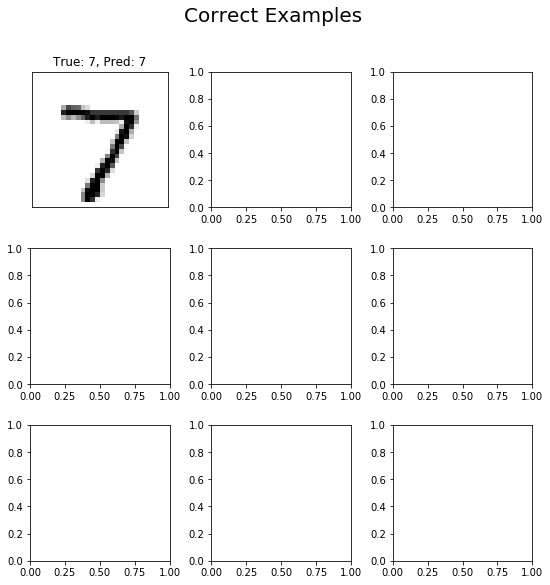

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

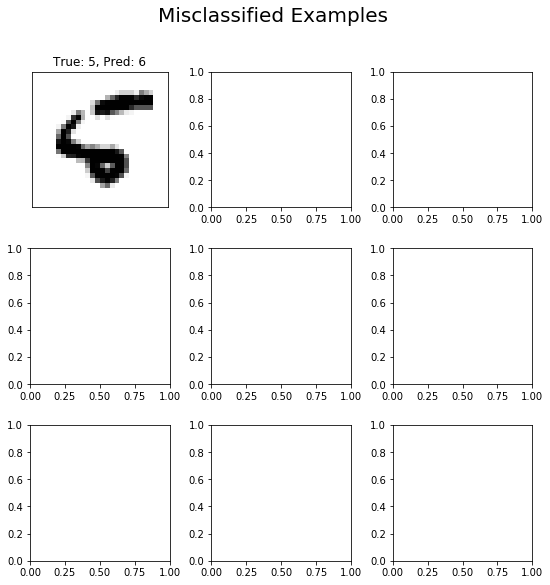

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [39]:
x_test,y_test = load_data(mode='test')
feed_dict_test={x:x_test[:1000],y:y_test[:1000]}
loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)
print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

cls_pred = sess.run(cls_prediction, feed_dict=feed_dict_test)
cls_true = np.argmax(y_test[:1000], axis=1)
plot_images(x_test, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(x_test[:1000], cls_true, cls_pred, title='Misclassified Examples')
plt.show()
